# ReEDS Scenarios on PV ICE Tool

To explore different scenarios for furture installation projections of PV (or any technology), ReEDS output data can be useful in providing standard scenarios. ReEDS installation projections are used in this journal as input data to the PV ICE tool. 

Current sections include:

<ol>
    <li> ### Reading a standard ReEDS output file and saving it in a PV ICE input format </li>
<li>### Reading scenarios of interest and running PV ICE tool </li>
<li>###Plotting </li>
<li>### GeoPlotting.</li>
</ol>
    Notes:
   
Scenarios of Interest:
	the Ref.Mod, 
o	95-by-35.Adv, and 
o	95-by-35+Elec.Adv+DR ones


In [1]:
# MAKE SURE YOU INSTAL DESCARTES AND GEOPANDAS TO RUN GEOPLOTTING at end of journal
import descartes
import geopandas as gpd
import random
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon


In [2]:
import PV_ICE
import numpy as np
import pandas as pd
import os,sys

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'TEMP')

print ("Your simulation will be stored in %s" % testfolder)


Your simulation will be stored in C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP


In [4]:
PV_ICE.__version__

'v0.2.0+277.g3dde40d.dirty'

### Reading REEDS original file to get list of SCENARIOs, PCAs, and STATEs 

In [5]:
reedsFile = str(Path().resolve().parent.parent.parent.parent / 'December Core Scenarios ReEDS Outputs Solar Futures v3a.xlsx')
print ("Input file is stored in %s" % reedsFile)

rawdf = pd.read_excel(reedsFile,
                        sheet_name="new installs PV")
                        #index_col=[0,2,3]) #this casts scenario, PCA and State as levels
#now set year as an index in place
#rawdf.drop(columns=['State'], inplace=True)
rawdf.drop(columns=['Tech'], inplace=True)
rawdf.set_index(['Scenario','Year','PCA', 'State'], inplace=True)

Input file is stored in C:\Users\sayala\Documents\GitHub\December Core Scenarios ReEDS Outputs Solar Futures v3a.xlsx


In [6]:
scenarios = list(rawdf.index.get_level_values('Scenario').unique())
PCAs = list(rawdf.index.get_level_values('PCA').unique())
STATEs = list(rawdf.index.get_level_values('State').unique())

### Reading GIS inputs

In [7]:
GISfile = str(Path().resolve().parent.parent.parent.parent / 'gis_centroid_n.xlsx')
GIS = pd.read_excel(GISfile)
GIS = GIS.set_index('id')

In [8]:
GIS.head()

,long,lat,country
id,,,
p1,-121.452252,47.820991,USA
p10,-117.159039,35.120104,USA
p100,-78.257714,38.791108,USA
p101,-82.192477,28.708695,USA
p102,-80.563731,26.677092,USA


In [9]:
GIS.loc['p1'].long

-121.4522522

### Create Scenarios in PV_ICE

#### Rename difficult characters from Scenarios Names

In [10]:
simulationname = scenarios
simulationname = [w.replace('+', '_') for w in simulationname]
simulationname

['95-by-35.Adv',
 '95-by-35.Adv_DR',
 '95-by-35.Mod',
 '95-by-35_Elec.Adv',
 '95-by-35_Elec.Adv_DR',
 '95-by-35_Elec.Mod',
 'Reference.Adv',
 'Reference.Adv_DR',
 'Reference.Mod']

#### Downselect to Solar Future scenarios of interest

Scenarios of Interest:
<li> Ref.Mod
<li> 95-by-35.Adv  
<li> 95-by-35+Elec.Adv+DR 

In [11]:
SFscenarios = [simulationname[0], simulationname[4], simulationname[8]]
SFscenarios

['95-by-35.Adv', '95-by-35_Elec.Adv_DR', 'Reference.Mod']

#### Create the 3 Scenarios and assign Baselines

Keeping track of each scenario as its own PV ICE Object.

In [12]:
#for ii in range (0, 1): #len(scenarios):
i = 0
r1 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(PCAs)): 
    filetitle = SFscenarios[i]+'_'+PCAs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'PCAs', filetitle)    
    r1.createScenario(name=PCAs[jj], massmodulefile=filetitle)
    r1.scenario[PCAs[jj]].addMaterials(['glass', 'silicon', 'silver', 'copper', 'aluminium_frames'], baselinefolder=r'..\baselines')
    r1.trim_Years(startYear=2010, endYear=2050)
    # All -- but these where not included in the Reeds initial study as we didnt have encapsulant or backsheet
    # r1.scenario[PCAs[jj]].addMaterials(['glass', 'silicon', 'silver', 'copper', 'aluminium_frames', 'encapsulant', 'backsheet'], baselinefolder=r'..\baselines')
    r1.scenario[PCAs[jj]].latitude = GIS.loc[PCAs[jj]].lat
    r1.scenario[PCAs[jj]].longitude = GIS.loc[PCAs[jj]].long

i = 1
r2 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(PCAs)): 
    filetitle = SFscenarios[i]+'_'+PCAs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'PCAs', filetitle)        
    r2.createScenario(name=PCAs[jj], massmodulefile=filetitle)
    r2.scenario[PCAs[jj]].addMaterials(['glass', 'silicon', 'silver', 'copper', 'aluminium_frames'], baselinefolder=r'..\baselines')
    r2.trim_Years(startYear=2010, endYear=2050)
    # All -- but these where not included in the Reeds initial study as we didnt have encapsulant or backsheet
    # r2.scenario[PCAs[jj]].addMaterials(['glass', 'silicon', 'silver', 'copper', 'aluminium_frames', 'encapsulant', 'backsheet'], baselinefolder=r'..\baselines')
    r2.scenario[PCAs[jj]].latitude = GIS.loc[PCAs[jj]].lat
    r2.scenario[PCAs[jj]].longitude = GIS.loc[PCAs[jj]].long

i = 2
r3 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)
for jj in range (0, len(PCAs)): 
    filetitle = SFscenarios[i]+'_'+PCAs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'PCAs', filetitle)        
    r3.createScenario(name=PCAs[jj], massmodulefile=filetitle)
    r3.scenario[PCAs[jj]].addMaterials(['glass', 'silicon', 'silver', 'copper', 'aluminium_frames'], baselinefolder=r'..\baselines')
    r3.trim_Years(startYear=2010, endYear=2050)
    # All -- but these where not included in the Reeds initial study as we didnt have encapsulant or backsheet
    # r3.scenario[PCAs[jj]].addMaterials(['glass', 'silicon', 'silver', 'copper', 'aluminium_frames', 'encapsulant', 'backsheet'], baselinefolder=r'..\baselines')
    r3.scenario[PCAs[jj]].latitude = GIS.loc[PCAs[jj]].lat
    r3.scenario[PCAs[jj]].longitude = GIS.loc[PCAs[jj]].long


path = C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_fra

Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy fi

Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed

Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, year

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Ener

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  20

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next 

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now en

Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, year

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:

Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  20

Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, year

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, year

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data

Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, year

Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next 

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  20

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silv

Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, year

Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  20

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Adding Mass AND Energy files for:  glass
Adding Mass AND Energy files for:  silicon
Adding Mass AND Energy files for:  silver
Adding Mass AND Energy files for:  copper
Adding Mass AND Energy files for:  aluminium_frames
No energy data loaded. Skipping for all next scenarios and materials
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now en

Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years now encompass  2010  to  2050
Data trimed, years n

# 2 Set characteristics of Recycling to SF values.

In [13]:
IRENA= False
PERFECTMFG = True

mats = ['glass', 'silicon','silver','copper','aluminum']

ELorRL = 'EL'
if IRENA:
    if ELorRL == 'RL':
        r1.scenMod_IRENIFY(ELorRL='RL')
        r2.scenMod_IRENIFY(ELorRL='RL')
        r3.scenMod_IRENIFY(ELorRL='RL')

    if ELorRL == 'EL':
        r1.scenMod_IRENIFY(ELorRL='EL')
        r2.scenMod_IRENIFY(ELorRL='EL')
        r3.scenMod_IRENIFY(ELorRL='EL')
    
    
    if PERFECTMFG:
        r1.scenMod_PerfectManufacturing()
        r2.scenMod_PerfectManufacturing()
        r3.scenMod_PerfectManufacturing()

    title_Method = 'Irena_'+ELorRL
else:
    title_Method = 'PVICE'


#### Calculate Mass Flow

In [14]:
r1.calculateMassFlow()
r2.calculateMassFlow()
r3.calculateMassFlow()

>>>> Calculating Material Flows <<<<

Working on Scenario:  p1
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p10
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p101
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material 

==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p127
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p128
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p129
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Work

==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p34
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p35
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p36
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p62
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p63
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p64
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Wor

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p90
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p91
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p92
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Wor

==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p118
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p119
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p12
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Worki

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p25
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p26
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p27
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Wor

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p53
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p54
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p55
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Wor

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p81
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p82
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p83
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Wor

==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p108
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p109
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p11
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Worki

==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p15
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p16
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p17
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p43
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p44
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p45
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Wor

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p71
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p72
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p73
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Wor

==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  p99
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminium_frames


In [15]:
print("PCAs:", r1.scenario.keys())
print("Module Keys:", r1.scenario[PCAs[jj]].dataIn_m.keys())
print("Material Keys: ", r1.scenario[PCAs[jj]].material['glass'].matdataIn_m.keys())

PCAs: dict_keys(['p1', 'p10', 'p100', 'p101', 'p102', 'p103', 'p104', 'p105', 'p106', 'p107', 'p108', 'p109', 'p11', 'p110', 'p111', 'p112', 'p113', 'p114', 'p115', 'p116', 'p117', 'p118', 'p119', 'p12', 'p120', 'p121', 'p122', 'p123', 'p124', 'p125', 'p126', 'p127', 'p128', 'p129', 'p13', 'p130', 'p131', 'p132', 'p133', 'p134', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p2', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p3', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p4', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p5', 'p50', 'p51', 'p52', 'p53', 'p54', 'p55', 'p56', 'p57', 'p58', 'p59', 'p6', 'p60', 'p61', 'p62', 'p63', 'p64', 'p65', 'p66', 'p67', 'p68', 'p69', 'p7', 'p70', 'p71', 'p72', 'p73', 'p74', 'p75', 'p76', 'p77', 'p78', 'p79', 'p8', 'p80', 'p81', 'p82', 'p83', 'p84', 'p85', 'p86', 'p87', 'p88', 'p89', 'p9', 'p90', 'p91', 'p92', 'p93', 'p94', 'p95', 'p96', 'p97', 'p98', 'p99'])
Module Keys: Index

In [16]:
"""
r1.plotScenariosComparison(keyword='Cumulative_Area_disposedby_Failure')
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')
r1.scenario['p1'].dataIn_m.head(21)
r2.scenario['p1'].dataIn_m.head(21)
r3.scenario['p1'].dataIn_m.head(21)
"""
pass

# SAVE DATA FOR BILLY: PCAs

### PCA vs. Cumulative Waste by 2050


In [17]:
#for 3 significant numbers rounding
N = 2

SFScenarios[kk].scenario[PCAs[zz]].data.year

Index 20 --> 2030

Index 30 --> 2040

Index 40 --> 2050

In [18]:
idx2030 = 20
idx2040 = 30
idx2050 = 40
print("index ", idx2030, " is year ", r1.scenario[PCAs[0]].dataIn_m['year'].iloc[idx2030])
print("index ", idx2040, " is year ", r1.scenario[PCAs[0]].dataIn_m['year'].iloc[idx2040])
print("index ", idx2050, " is year ", r1.scenario[PCAs[0]].dataIn_m['year'].iloc[idx2050])

index  20  is year  2030
index  30  is year  2040
index  40  is year  2050


#### 1 - PCA Cumulative Virgin Needs by 2050

In [19]:
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

In [20]:
keyword='mat_Virgin_Stock'

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = []
    for ii in range (0, len(materials)):    
        
        keywordsum = []
        for zz in range (0, len(PCAs)):
            keywordsum.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].matdataOut_m[keyword].sum())
    
        materiallist.append(keywordsum)
    df = pd.DataFrame (materiallist,columns=PCAs, index = materials)
    df = df.T
    df = df.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , df], axis=1)

scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 1 - PCA Cumulative2050 VirginMaterialNeeds_tons.csv')

#### 2 - PCA Cumulative EoL Only Waste by 2050

In [21]:
keyword='mat_Total_EOL_Landfilled'

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = []
    for ii in range (0, len(materials)):    
        
        keywordsum = []
        for zz in range (0, len(PCAs)):
            keywordsum.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].matdataOut_m[keyword].sum())
    
        materiallist.append(keywordsum)
    df = pd.DataFrame (materiallist,columns=PCAs, index = materials)
    df = df.T
    df = df.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , df], axis=1)

scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 2 - PCA Cumulative2050 Waste EOL_tons.csv')

#### 3 - PCA Yearly Virgin Needs 2030 2040 2050

In [22]:
keyword='mat_Virgin_Stock'

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(PCAs)):
            keywordsum2030.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].matdataOut_m[keyword][idx2030])
            keywordsum2040.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].matdataOut_m[keyword][idx2040])
            keywordsum2050.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].matdataOut_m[keyword][idx2050])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=PCAs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 3 - PCA Yearly 2030 2040 2050 VirginMaterialNeeds_tons.csv')

#### 4 - PCA Yearly EoL Waste 2030 2040 2050

In [23]:
keyword='mat_Total_Landfilled'

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(PCAs)):
            keywordsum2030.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].matdataOut_m[keyword][idx2030])
            keywordsum2040.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].matdataOut_m[keyword][idx2040])
            keywordsum2050.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].matdataOut_m[keyword][idx2050])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=PCAs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tonnes
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 4 - PCA Yearly 2030 2040 2050 Waste_EOL_tons.csv')

# GEOPANDAS

Some simple mapping that was not really used for the journal but keeping it here just in case I need to revisit this code. 

In [24]:
latitude_all =[]
longitude_all = []
cumulativewaste2050 = []
for scen in r1.scenario.keys():
    latitude_all.append(r1.scenario[scen].latitude)
    longitude_all.append(r1.scenario[scen].longitude)
    cumulativewaste2050.append(r1.scenario[scen].material['glass'].matdataOut_m['mat_Total_Landfilled'].sum())

The cb_2018_us_nation_20m.shp is a Cartographic Boundary File - Shapefile from the US Census.gov page

Downloaded from https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
on November 29, 2022.

We don't own this file, but as some of our journals use it for mapping it is included here. Please cite
the census if you are using this mapping feature.

In [25]:
pwd

'C:\\Users\\sayala\\Documents\\GitHub\\PV_ICE\\PV_ICE\\TEMP'

In [26]:
street_map = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_nation_20m.zip')
    
# Show the map only
#fig, ax = plt.subplots(figsize=(10,15))
#street_map.plot(ax=ax)

In [27]:
frame = { 'Latitude': latitude_all, 'Longitude': longitude_all, 'CumulativeWaste2050': cumulativewaste2050}   
df = pd.DataFrame(frame) 

In [28]:
df.head()

,Latitude,Longitude,CumulativeWaste2050
0,47.820991,-121.452252,8.211018e+09
1,35.120104,-117.159039,7.613465e+11
2,38.791108,-78.257714,4.863157e+09
3,28.708695,-82.192477,1.981487e+11
4,26.677092,-80.563731,1.028099e+11


In [29]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geometry[:3]

In [30]:
crs = {'init':'epsg:4326'}

In [31]:
geo_df = gpd.GeoDataFrame(df, # specify our data
                         crs = crs, # specify our coordinate reference system
                         geometry = geometry) # specify the geometry list we created
geo_df.head()

C:\Users\sayala\Anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Latitude,Longitude,CumulativeWaste2050,geometry
0,47.820991,-121.452252,8.211018e+09,POINT (-121.45225 47.82099)
1,35.120104,-117.159039,7.613465e+11,POINT (-117.15904 35.12010)
2,38.791108,-78.257714,4.863157e+09,POINT (-78.25771 38.79111)
3,28.708695,-82.192477,1.981487e+11,POINT (-82.19248 28.70870)
4,26.677092,-80.563731,1.028099e+11,POINT (-80.56373 26.67709)


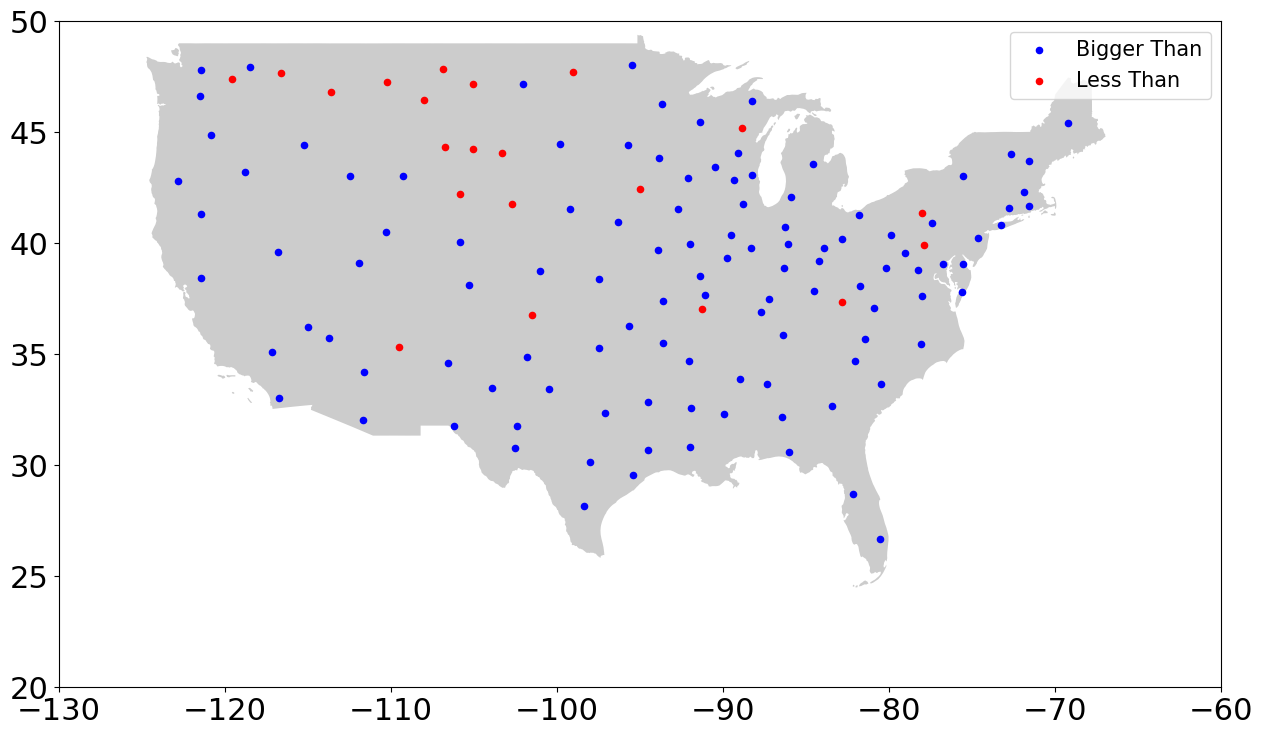

In [32]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df['CumulativeWaste2050'] >= 1.918125e+09].plot(ax=ax, markersize = 20, color= "blue", marker = "o", label = "Bigger Than")
geo_df[geo_df['CumulativeWaste2050'] < 1.918125e+09].plot(ax=ax, markersize = 20, color= "red", marker = "o", label = "Less Than")
plt.xlim([-130, -60])
plt.ylim([20, 50])
plt.legend(prop={'size':15})

C:\Users\sayala\Anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


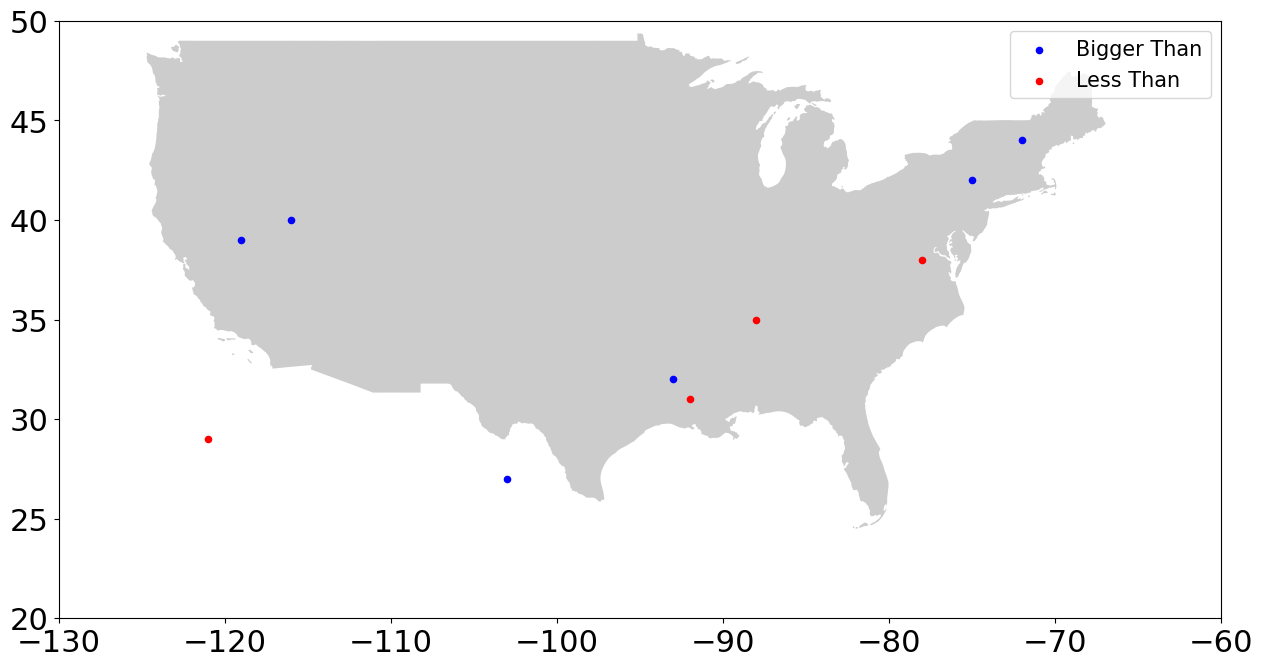

In [33]:
latitude = random.sample(range(25, 45), 10) 
longitude = random.sample(range(-125, -65), 10) 
weight = random.sample(range(0, 500), 10) 

frame = { 'Latitude': latitude, 'Longitude': longitude, 'Weight': weight}   
df = pd.DataFrame(frame) 

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, # specify our data
                         crs = crs, # specify our coordinate reference system
                         geometry = geometry) # specify the geometry list we created

fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df['Weight'] >=250].plot(ax=ax, markersize = 20, color= "blue", marker = "o", label = "Bigger Than")
geo_df[geo_df['Weight'] < 250].plot(ax=ax, markersize = 20, color= "red", marker = "o", label = "Less Than")
plt.xlim([-130, -60])
plt.ylim([20, 50])
plt.legend(prop={'size':15})

# OBSOLETE BECAUSE FASTER TO DO ON NATION LEVEL

## Aggregating PCAs Material Landfilled to obtain US totals by Year

In [ ]:
### Singe Material Example Aggregating PCAs to obtain US Total

"""
keyword='mat_Total_Landfilled'
#keyword='new_Installed_Capacity_[MW]'

plt.figure()
plt.plot(r1.scenario[PCAs[0]].dataIn_m['year'], foo, label=PCAs[12])
plt.title(keyword)
plt.legend()

for jj in range (1, len(PCAs)): 
    foo['silver'] += r1.scenario[PCAs[jj]].material['silver'].matdataIn_m[keyword]


fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.plot(r1.scenario[PCAs[0]].dataIn_m['year'], foo['silver'], label='US')
plt.title("Material Landfilled per Year US")
#ax.set_yscale('log')
print(max(foo))
"""
pass

In [ ]:
### Verbose Material Example Aggregating PCAs to obtain US Total

"""
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

USyearlyWASTE=pd.DataFrame()

# Loop over Materials
for ii in range (0, len(materials)):    
    material = materials[ii]
    foo1 = r1.scenario[PCAs[0]].material[material].matdataIn_m[keyword].copy()
    foo1 = foo1.to_frame(name=material)
    foo2 = r2.scenario[PCAs[0]].material[material].matdataIn_m[keyword].copy()
    foo2 = foo2.to_frame(name=material)
    foo3 = r3.scenario[PCAs[0]].material[material].matdataIn_m[keyword].copy()
    foo3 = foo3.to_frame(name=material)

    USyearlyWASTE[r1.name + '_' + material] = foo1[material]
    USyearlyWASTE[r2.name + '_' + material] = foo2[material]
    USyearlyWASTE[r3.name + '_' + material] = foo3[material]

    # Loop over PCAs
    for jj in range (1, len(PCAs)): 
        USyearlyWASTE[r1.name + '_' + material] += r1.scenario[PCAs[jj]].material[material].matdataIn_m[keyword]
        USyearlyWASTE[r2.name + '_' + material] += r2.scenario[PCAs[jj]].material[material].matdataIn_m[keyword]
        USyearlyWASTE[r3.name + '_' + material] += r3.scenario[PCAs[jj]].material[material].matdataIn_m[keyword]

# Converting to grams to Tons. 
USyearlyWASTE = USyearlyWASTE/907185
USyearlyWASTE.head(20)
"""
pass

In [ ]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

USyearly=pd.DataFrame()

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    for ii in range (0, len(materials)):    
        material = materials[ii]
        foo = obj.scenario[PCAs[0]].material[material].matdataIn_m[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["Waste_"+material+'_'+obj.name] = foo[material]

        # Loop over PCAs
        for jj in range (1, len(PCAs)): 
            USyearly["Waste_"+material+'_'+obj.name] += obj.scenario[PCAs[jj]].material[material].matdataIn_m[keyword]

# Converting to grams to Tons. 
#USyearly = USyearly/907185
USyearly.head(20)

In [ ]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    for ii in range (0, len(materials)):    
        material = materials[ii]
        foo = obj.scenario[PCAs[0]].material[material].matdataIn_m[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["VirginStock_"+material+'_'+obj.name] = foo[material]

        # Loop over PCAs
        for jj in range (1, len(PCAs)): 
            USyearly["VirginStock_"+material+'_'+obj.name] += obj.scenario[PCAs[jj]].material[material].matdataIn_m[keyword]



### Converting to grams to Tons. 


In [ ]:
USyearly = USyearly/1000000  # This is the ratio for Metric tonnes
#907185 -- this is for US tons

### Adding Installed Capacity to US

In [ ]:
keyword='Installed_Capacity_[W]'

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    foo = obj.scenario[PCAs[0]].dataIn_m[keyword]
    foo = foo.to_frame(name=keyword)
    USyearly["Capacity_"+obj.name] = foo[keyword]

    # Loop over PCAs
    for jj in range (1, len(PCAs)): 
        USyearly["Capacity_"+obj.name] += obj.scenario[PCAs[jj]].dataIn_m[keyword]

USyearly.head(20)

In [ ]:
keywords=['VirginStock_', 'Waste_', 'Capacity']
SFScenarios = [r1, r2, r3]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        obj = SFScenarios[kk]
        plt.figure()
        plt.plot([],[],color='m', label='glass', linewidth=5)
        plt.plot([],[],color='c', label='silicon', linewidth=5)
        plt.plot([],[],color='r', label='silver', linewidth=5)
        plt.plot([],[],color='k', label='copper', linewidth=5)
        plt.plot([],[],color='g', label='aluminum', linewidth=5)

        plt.stackplot(obj.scenario[PCAs[0]].dataIn_m['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['m','c','r','k', 'g'])
        plt.ylabel('Mass [Tons]')
        plt.xlim([2010, 2050])
        plt.title('Yearly '+keyw+ ' ' + obj.name)
        plt.legend(materials)


In [ ]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[PCAs[0]].dataIn_m['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 
       
for i in range (0, 3):
    axs[i].set_ylim([0, 4e7])
    axs[i+3].set_ylim([0, 4e7])

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[5].legend(materials)
        

In [ ]:
USyearly.keys()

In [ ]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(3,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[PCAs[0]].dataIn_m['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 

        
# CAPACITY IS BY MODULE NOT MATERIAL:
ii = 2
keyw = keywords[ii]

# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    #axs[i].plot([],[],color='c', label='glass', linewidth=5)
    axs[i].plot(obj.scenario[PCAs[0]].dataIn_m['year'], USyearly[keyw+obj.name])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' ' + obj.name)
    #axs[i].legend(materials)
    i += 1 




for i in range (0, 3):
    axs[i].set_ylim([0, 4e7])
    axs[i+3].set_ylim([0, 4e7])

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[5].legend(materials)
        

In [ ]:
UScum = USyearly.copy()
UScum = UScum.cumsum()
UScum.head()

In [ ]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
SFScenarios = [r1, r2, r3]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

    
fig, axs = plt.subplots(3,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[PCAs[0]].dataIn_m['year'], UScum[keyw+materials[0]+'_'+obj.name], 
                                                          UScum[keyw+materials[1]+'_'+obj.name], 
                                                          UScum[keyw+materials[2]+'_'+obj.name], 
                                                          UScum[keyw+materials[3]+'_'+obj.name], 
                                                          UScum[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 

# CAPACITY IS BY MODULE NOT MATERIAL:
ii = 2
keyw = keywords[ii]

# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    #axs[i].plot([],[],color='c', label='glass', linewidth=5)
    axs[i].plot(obj.scenario[PCAs[0]].dataIn_m['year'], USyearly[keyw+obj.name]/1e6)
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' ' + obj.name)
    #axs[i].legend(materials)
    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([1e0, 10e8])
    axs[i+3].set_ylim([1e0, 10e8])
    axs[i+6].set_ylim([1e0, 10e7])

    axs[i].set_yscale('log')
    axs[i+3].set_yscale('log')
    axs[i+6].set_yscale('log')
    
    
axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[6].set_ylabel('Installed Capacity [TW]')
axs[5].legend(materials)
